ALWAYS RUN THIS

In [1]:

import tensorflow as tf  # Main TensorFlow library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

from xgboost import plot_importance,XGBClassifier,XGBRegressor

import matplotlib.pyplot as plt #for graphs
import pathlib # for directories
import PIL # for image manipulation
import pandas as pd
import numpy as np
import os

import seaborn as sns



In [2]:
import zipfile

# Path to your downloaded zip file
zip_path = 'C:/Users/mansa/PycharmProjects/housing-iet-hackathon/.github/hackathon-2.zip'
extract_path = 'C:/Users/mansa/PycharmProjects/housing-iet-hackathon/.github/'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped!")

import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv(extract_path + 'train_data.csv')
print(df.head())


Dataset unzipped!
    ID  Bedrooms  Bathrooms  Area  ZipCode    Price
0  285         5        5.0  3816    92880   589900
1  348         2        2.0  1440    92276   106000
2  441         4        3.0  1625    93510   639000
3  422         4        3.0  2454    93510  5858000
4  150         4        4.5  4038    92677  1795000


RUN IN PAIRS


In [3]:
#preparing the files.

images_test_dir = pathlib.Path("C:/Users/mansa/Documents/Hackathon/dataset/images_test")
images_train_dir = pathlib.Path("C:/Users/mansa/Documents/Hackathon/dataset/images_train")
submission_template_path = pathlib.Path("C:/Users/mansa/Documents/Hackathon/dataset/submission_template.csv")
test_data_path = pathlib.Path("C:/Users/mansa/Documents/Hackathon/dataset/test_data_no_target.csv")
train_data_path = pathlib.Path("C:/Users/mansa/Documents/Hackathon/dataset/train_data.csv")


# Make the directory a Path object
images_train_dir = pathlib.Path(images_train_dir)

# Count images in train and test directories
train_image_count = len(list(images_train_dir.glob('*.jpg'))) + len(list(images_train_dir.glob('*.JPG')))
test_image_count = len(list(images_test_dir.glob('*.jpg'))) + len(list(images_test_dir.glob('*.JPG')))

print(f"Total training images: {train_image_count}")
print(f"Total testing images: {test_image_count}")


Total training images: 0
Total testing images: 856


RUN THE ABOVE CODE TO RUN THIS.


In [4]:
#verifying paths and loading data

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
submission_template = pd.read_csv(submission_template_path)

print(f"Train data:\n{train_data.head()}")
print(f"Test data:\n{test_data.head()}")
print(f"Submission template:\n{submission_template.head()}")

Train data:
    ID  Bedrooms  Bathrooms  Area  ZipCode    Price
0  285         5        5.0  3816    92880   589900
1  348         2        2.0  1440    92276   106000
2  441         4        3.0  1625    93510   639000
3  422         4        3.0  2454    93510  5858000
4  150         4        4.5  4038    92677  1795000
Test data:
    ID  Bedrooms  Bathrooms  Area  ZipCode
0  118         3        2.5  1915    92021
1  133         3        2.5  2248    92677
2  155         3        1.0  1132    96019
3  246         6        4.0  3375    92880
4   85         3        2.5  2733    91901
Submission template:
    ID  Price
0  118      0
1  133      0
2  155      0
3  246      0
4   85      0


In [5]:
#resizing and optimization of images.
data_dir = pathlib.Path("C:/Users/mansa/Documents/Hackathon/dataset/images_train")
# Define parameters
batch_size = 32
img_height = 224
img_width = 224

# Set up the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # 20% Validation split
    subset="training",    # Specify subset for training
    seed=123,             # Seed for reproducibility
    image_size=(img_height, img_width),  # Resize images
    batch_size=batch_size  # Batch size
)


val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # 20% Validation split
    subset="validation",   # Specify subset for validation
    seed=123,              # Seed for reproducibility
    image_size=(img_height, img_width),  # Resize images
    batch_size=batch_size  # Batch size
)

print(f"Training dataset: {train_ds}")
print(f"Validation dataset: {val_ds}")

Found 1712 files belonging to 13 classes.
Using 1370 files for training.
Found 1712 files belonging to 13 classes.
Using 342 files for validation.
Training dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [6]:
import os

data_dir = "C:/Users/mansa/Documents/Hackathon/dataset/images_train"
# List all files in the directory
for root, dirs, files in os.walk(data_dir):
    for name in files:
        print(os.path.join(root, name))


C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\100_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\101_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\103_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\104_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\106_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\107_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\108_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\109_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\110_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\111_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\112_bathroom.jpg
C:/Users/mansa/Documents/Hackathon/dataset/images_train\bathroom\113_bathroom.jpg
C:/Users/mansa/D

In [7]:
#normalize numerical features -for tabular data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
train_data = pd.read_csv("C:/Users/mansa/Documents/Hackathon/dataset/train_data.csv")

# List of numerical columns to normalize
numerical_features = ['Bedrooms', 'Bathrooms', 'Area']

# Initialize the scaler
scaler = MinMaxScaler()
# Fit and transform the data
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

print(train_data.head())

    ID  Bedrooms  Bathrooms      Area  ZipCode    Price
0  285  0.444444   0.666667  0.350709    92880   589900
1  348  0.111111   0.166667  0.083202    92276   106000
2  441  0.333333   0.333333  0.104031    93510   639000
3  422  0.333333   0.333333  0.197365    93510  5858000
4  150  0.333333   0.583333  0.375704    92677  1795000


In [8]:
#encoding categorical features  -for tabular data

# List of categorical columns to encode
categorical_features = ['ZipCode']
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the data
encoded_features = encoder.fit_transform(train_data[categorical_features])
# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))


# Concatenate the encoded features with the original DataFrame
train_data = pd.concat([train_data, encoded_df], axis=1)
# Drop the original categorical columns
train_data.drop(columns=categorical_features, inplace=True)

print(train_data.head())


    ID  Bedrooms  Bathrooms      Area    Price  ZipCode_36372  ZipCode_60002  \
0  285  0.444444   0.666667  0.350709   589900            0.0            0.0   
1  348  0.111111   0.166667  0.083202   106000            0.0            0.0   
2  441  0.333333   0.333333  0.104031   639000            0.0            0.0   
3  422  0.333333   0.333333  0.197365  5858000            0.0            0.0   
4  150  0.333333   0.583333  0.375704  1795000            0.0            0.0   

   ZipCode_62025  ZipCode_62034  ZipCode_62214  ...  ZipCode_93720  \
0            0.0            0.0            0.0  ...            0.0   
1            0.0            0.0            0.0  ...            0.0   
2            0.0            0.0            0.0  ...            0.0   
3            0.0            0.0            0.0  ...            0.0   
4            0.0            0.0            0.0  ...            0.0   

   ZipCode_93924  ZipCode_94501  ZipCode_94531  ZipCode_94565  ZipCode_94568  \
0            0.0  

    ID  Bedrooms  Bathrooms  Area  ZipCode    Price
0  285         5        5.0  3816    92880   589900
1  348         2        2.0  1440    92276   106000
2  441         4        3.0  1625    93510   639000
3  422         4        3.0  2454    93510  5858000
4  150         4        4.5  4038    92677  1795000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         428 non-null    int64  
 1   Bedrooms   428 non-null    int64  
 2   Bathrooms  428 non-null    float64
 3   Area       428 non-null    int64  
 4   ZipCode    428 non-null    int64  
 5   Price      428 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 20.2 KB
None
<bound method DataFrame.sum of         ID  Bedrooms  Bathrooms   Area  ZipCode  Price
0    False     False      False  False    False  False
1    False     False      False  False    False  False
2    False  

C:\Users\mansa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error: 144379.42988372094
Mean Squared Error: 54711937941.19483
Root Mean Squared Error: 233905.83135354883


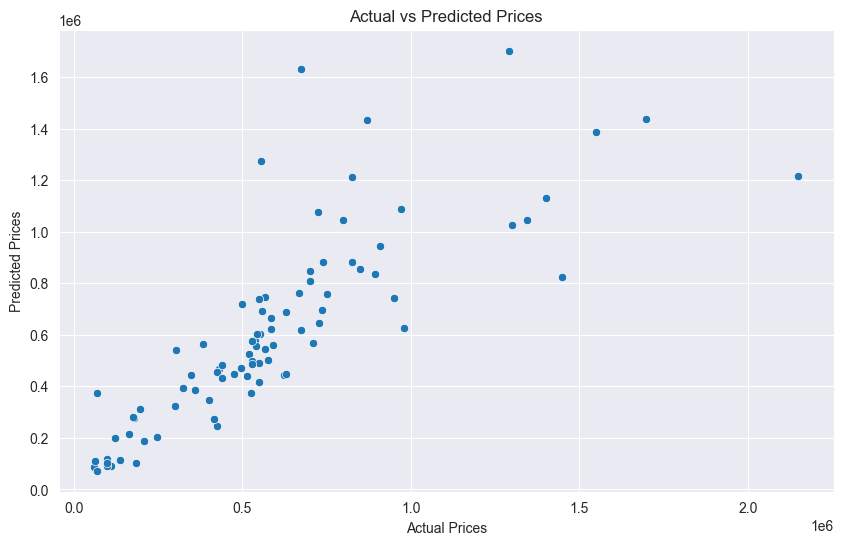

In [9]:
#regression model
import seaborn as sns

file_path = r"C:\Users\mansa\Documents\Hackathon\dataset\train_data.csv"

displayFile = pd.read_csv(file_path)
print(displayFile.head())
print(displayFile.info())
print(displayFile.isnull().sum)

displayFile = displayFile.fillna(displayFile.median())
displayFile = pd.get_dummies(displayFile,drop_first=True)
print(displayFile.columns)
x = displayFile.drop("Price", axis =1)
y = displayFile["Price"]
target_column = "Price"


if target_column in displayFile.columns:
    X = displayFile.drop(target_column, axis=1)
    y = displayFile[target_column]
else:
    print(f"Column '{target_column}' not found in DataFrame.")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [10]:
import os
import shutil
import pandas as pd

# Paths
images_dir = "C:/Users/mansa/Documents/Hackathon/dataset/images_train"
csv_path = "C:/Users/mansa/Documents/Hackathon/dataset/train_data.csv"

# Load CSV
data = pd.read_csv(csv_path)

# Assuming images follow a naming convention like 'ID.jpg'
for index, row in data.iterrows():
    image_id = row['ID']
    # Mock class based on other columns (e.g., Bedroom count)
    image_class = row['Bedrooms']

    # Create class directories
    class_dir = os.path.join(images_dir, str(image_class))
    os.makedirs(class_dir, exist_ok=True)

    # Move images
    filename = f'{image_id}.jpg'  # Assuming filenames match ID.jpg
    src = os.path.join(images_dir, filename)
    dst = os.path.join(class_dir, filename)
    if os.path.exists(src):  # Only move if the file exists
        shutil.move(src, dst)

print("Images sorted successfully!")



Images sorted successfully!


In [11]:
import pandas as pd

# Path to your CSV file
csv_path = "C:/Users/mansa/Documents/Hackathon/dataset/train_data.csv"

# Load the CSV file
data = pd.read_csv(csv_path)

# Display the column names
print(data.columns)

Index(['ID', 'Bedrooms', 'Bathrooms', 'Area', 'ZipCode', 'Price'], dtype='object')


In [12]:
#training validation split 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Step 1: Set up the ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    validation_split=0.2  # Split data into training and validation sets
)

# Step 2: Create training data generator
train_data = data_gen.flow_from_directory(
    "C:/Users/mansa/Documents/Hackathon/dataset/images_train",  # Local path to training images
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset='training'  # Specify training subset
)

# Step 3: Create validation data generator
val_data = data_gen.flow_from_directory(
    "C:/Users/mansa/Documents/Hackathon/dataset/images_train",  # Local path to training images
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset='validation'  # Specify validation subset
)

print("Training data generator created successfully.")
print("Validation data generator created successfully.")


Found 1372 images belonging to 13 classes.
Found 340 images belonging to 13 classes.
Training data generator created successfully.
Validation data generator created successfully.


In [2]:
from keras.src.layers import BatchNormalization, Dropout
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Step 1: Set up the ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    validation_split=0.2  # Split data into training and validation sets
)

# Step 2: Create training data generator
train_data = data_gen.flow_from_directory(
    "C:/Users/mansa/Documents/Hackathon/dataset/images_train",  # Local path to training images
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset='training'  # Specify training subset
)

# Step 3: Create validation data generator
val_data = data_gen.flow_from_directory(
    "C:/Users/mansa/Documents/Hackathon/dataset/images_train",  # Local path to training images
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset='validation'  # Specify validation subset
)

# Load the ResNet50 model, pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom top layers
x = base_model.output
x = Flatten()(x)
# First Dense Layer
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Batch Normalization
x = Dropout(0.5)(x)           # Dropout to reduce overfitting

# Second Dense Layer
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Third Dense Layer
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Fourth Dense Layer
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)


predictions = Dense(train_data.num_classes, activation='softmax')(x)

# Combine the base model with the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=30)


Found 1372 images belonging to 13 classes.
Found 340 images belonging to 13 classes.
Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 49s 969ms/step - accuracy: 0.1480 - loss: 3.4286 - val_accuracy: 0.2941 - val_loss: 3.6823
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 924ms/step - accuracy: 0.4311 - loss: 2.1537 - val_accuracy: 0.2500 - val_loss: 4.9936
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5749 - loss: 1.6213 - val_accuracy: 0.2559 - val_loss: 5.0101
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 962ms/step - accuracy: 0.6341 - loss: 1.2797 - val_accuracy: 0.3941 - val_loss: 3.8645
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 39s 901ms/step - accuracy: 0.6754 - loss: 1.1174 - val_accuracy: 0.3941 - val_loss: 4.3059
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 38s 874ms/step - accuracy: 0.7063 - loss: 0.9623 - val_accuracy: 0.3882 - val_loss: 3.9244
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 38s 884ms/step - accuracy: 0.7152 - loss: 0.9258 - val_accuracy: 0.5647 - val_loss: 1.7743
Epoch 8/30
43/4

In [3]:
#training the model
for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30
)


Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 817ms/step - accuracy: 0.8308 - loss: 0.4305 - val_accuracy: 0.2559 - val_loss: 14.5870
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 34s 788ms/step - accuracy: 0.8443 - loss: 0.4116 - val_accuracy: 0.5412 - val_loss: 4.3545
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 38s 892ms/step - accuracy: 0.8492 - loss: 0.4158 - val_accuracy: 0.6029 - val_loss: 1.8530
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 38s 885ms/step - accuracy: 0.8774 - loss: 0.3601 - val_accuracy: 0.5176 - val_loss: 3.2863
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 941ms/step - accuracy: 0.8455 - loss: 0.3737 - val_accuracy: 0.4029 - val_loss: 3.4240
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 37s 861ms/step - accuracy: 0.8670 - loss: 0.3436 - val_accuracy: 0.3441 - val_loss: 4.0932
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 39s 916ms/step - accuracy: 0.8407 - loss: 0.3647 - val_accuracy: 0.6176 - val_loss: 2.5728
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 38s 895ms/step - accuracy: 0.8826 - loss: 0.3080 - val_acc

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the validation data
y_pred = model.predict(val_data)

# Since y_pred and val_data.labels might not be directly comparable due to encoding,
# decode the predictions and the ground truth.
y_pred_labels = tf.argmax(y_pred, axis=1)
y_true_labels = val_data.labels

# Calculate MAE and RMSE
mae = mean_absolute_error(y_true_labels, y_pred_labels)
rmse = mean_squared_error(y_true_labels, y_pred_labels, squared=False)

# Print the results
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 655ms/step
Mean Absolute Error: 1.1764705882352942
Root Mean Squared Error: 1.459250411925891


C:\Users\mansa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define test image directory
test_images_dir = "C:/Users/mansa/Documents/Hackathon/dataset/images_test"

# Load the test data (excluding the 'Price' column)
test_data = pd.read_csv('C:/Users/mansa/Documents/Hackathon/dataset/test_data_no_target.csv')

# Set up the ImageDataGenerator for test data
test_data_gen = ImageDataGenerator(rescale=1./255)

# Create test data generator
test_data_gen = test_data_gen.flow_from_directory(
    test_images_dir,  # Path to test images
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode=None,  # No labels
    shuffle=False  # Keep order of images
)

# Make predictions on the test images
y_pred = model.predict

Found 0 images belonging to 0 classes.
